We start training different models and evaluate results

## Loading Data

In [1]:
# Import libraries needed
import pandas as pd


In [2]:
PATH_INPUT_CSV = './data_train_merged_23_10.csv'


In [3]:
# We read Excel with Historic data of landslides and other events
training = pd.read_csv(PATH_INPUT_CSV,index_col=0)


In [4]:
len(training)

9742

In [286]:
for col in ['elevation','slope','aspect','procurv','placurv']:
    training['{}_mean'.format(col)] = (
        training['{}_1'.format(col)] + 
        training['{}_2'.format(col)] + 
        training['{}_3'.format(col)] + 
        training['{}_4'.format(col)] + 
        training['{}_5'.format(col)] + 
        training['{}_6'.format(col)] + 
        training['{}_7'.format(col)] + 
        training['{}_8'.format(col)] + 
        training['{}_9'.format(col)] + 
        training['{}_10'.format(col)] + 
        training['{}_11'.format(col)] + 
        training['{}_12'.format(col)] + 
        training['{}_13'.format(col)] + 
        training['{}_14'.format(col)] + 
        training['{}_15'.format(col)] + 
        training['{}_16'.format(col)] + 
        training['{}_17'.format(col)] + 
        training['{}_18'.format(col)] + 
        training['{}_19'.format(col)] + 
        training['{}_20'.format(col)] + 
        training['{}_21'.format(col)] + 
        training['{}_22'.format(col)] + 
        training['{}_23'.format(col)] + 
        training['{}_24'.format(col)] + 
        training['{}_25'.format(col)]  
    )/25

## Preprocessing


We process features and generate training data and test data

In [7]:
# Import skleran preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [288]:
df = training

In [9]:
len(list(training.columns))


151

In [289]:
# We use a label encoder for each of the columns of categories
features_string = [ 
 'soil_tax',
 'satellite',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period']
for feature in features_string:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [290]:
features = [
# #     'elevation_1',
# #  'elevation_6',
# #  'elevation_11',
# #  'elevation_16',
# #  'elevation_21',
# #  'elevation_2',
# #  'elevation_7',
# #  'elevation_12',
# #  'elevation_17',
# #  'elevation_22',
#  'elevation_3',
#  'elevation_8',
 'elevation_mean',
#  'elevation_18',
#  'elevation_23',
# #  'elevation_4',
# #  'elevation_9',
# #  'elevation_14',
# #  'elevation_19',
# #  'elevation_24',
# #  'elevation_5',
# #  'elevation_10',
# #  'elevation_15',
# #  'elevation_20',
# #  'elevation_25',
# #  'slope_1',
# #  'slope_6',
# #  'slope_11',
# #  'slope_16',
# #  'slope_21',
# #  'slope_2',
# #  'slope_7',
# #  'slope_12',
# #  'slope_17',
# #  'slope_22',
#  'slope_3',
#  'slope_8',
 'slope_mean',
#  'slope_18',
#  'slope_23',
# #  'slope_4',
# #  'slope_9',
# #  'slope_14',
# #  'slope_19',
# #  'slope_24',
# #  'slope_5',
# #  'slope_10',
# #  'slope_15',
# #  'slope_20',
# #  'slope_25',
# #  'aspect_1',
# #  'aspect_6',
# #  'aspect_11',
# #  'aspect_16',
# #  'aspect_21',
# #  'aspect_2',
# #  'aspect_7',
# #  'aspect_12',
# #  'aspect_17',
# #  'aspect_22',
#  'aspect_3',
#  'aspect_8',
 'aspect_mean',
#  'aspect_18',
#  'aspect_23',
# #  'aspect_4',
# #  'aspect_9',
# #  'aspect_14',
# #  'aspect_19',
# #  'aspect_24',
# #  'aspect_5',
# #  'aspect_10',
# #  'aspect_15',
# #  'aspect_20',
# #  'aspect_25',
# #  'placurv_1',
# #  'placurv_6',
# #  'placurv_11',
# #  'placurv_16',
# #  'placurv_21',
# #  'placurv_2',
# #  'placurv_7',
# #  'placurv_12',
# #  'placurv_17',
# #  'placurv_22',
#  'placurv_3',
#  'placurv_8',
 'placurv_mean',
#  'placurv_18',
#  'placurv_23',
# #  'placurv_4',
# #  'placurv_9',
# #  'placurv_14',
# #  'placurv_19',
# #  'placurv_24',
# #  'placurv_5',
# #  'placurv_10',
# #  'placurv_15',
# #  'placurv_20',
# #  'placurv_25',
# #  'procurv_1',
# #  'procurv_6',
# #  'procurv_11',
# #  'procurv_16',
# #  'procurv_21',
# #  'procurv_2',
# #  'procurv_7',
# #  'procurv_12',
# #  'procurv_17',
# #  'procurv_22',
#  'procurv_3',
#  'procurv_8',
 'procurv_mean',
#  'procurv_18',
#  'procurv_23',
# #  'procurv_4',
# #  'procurv_9',
# #  'procurv_14',
# #  'procurv_19',
# #  'procurv_24',
# #  'procurv_5',
# #  'procurv_10',
# #  'procurv_15',
# #  'procurv_20',
# #  'procurv_25',
# #  'latitude',
# #  'longitude',
# # 'event_date',
# #  'departamento',
# #  'municipio',
# #  'incident',
# #  'image_name'
 'precipitation_mm_last_7_days',
#  'satellite',
 'soil_tax',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
#  'fis_nomr',
 'soil_use',
#  'rock_geo',
 'rock_type',
 'rock_period',
]


In [291]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['landslide'], test_size=0.3,random_state=0)


In [15]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 4059, 1: 2760})
Testing target statistics: Counter({0: 1705, 1: 1218})


In [292]:
len(training)

9742

## Start Training different models

### Create Training Models

In [222]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_recall_fscore_support,f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve


In [293]:
def train_with_model_train_test_method(clf, model, X_train, y_train, X_test,y_test, using_oversample=False):
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    prediction_train_y = clf.predict(X_train)
    prediction_prob_y_train = clf.predict_proba(X_train)
    accuracy_score_model = accuracy_score(y_test, prediction)
    accuracy_score_train = accuracy_score(y_train, prediction_train_y)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    roc_auc_score_train = roc_auc_score(y_train,prediction_prob_y_train[:,1], labels=[1,0])
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Scores")
    print("Accuracy score Test: {}".format( str(accuracy_score_model)))
    print("RocAuc score Test: {}".format( str(roc_auc_score_model)))
    print("Accuracy score Train: {}".format( str(accuracy_score_train)))
    print("RocAuc score Train: {}".format( str(roc_auc_score_train)))
    print("Confusion Matrix")
    confusion_matrix_model = confusion_matrix(y_test, prediction, labels=[1,0])
    print((confusion_matrix_model))
    target_names = ['non_landslide','landslide']
    print("Classification Report")
    class_report = classification_report(y_test, prediction, target_names=target_names)
    print(class_report)
    print(" Roc Curve")
    fpr, tpr, _ = roc_curve(y_test,  prediction_prob[::,1], pos_label=1)
    fpr_t, tpr_t, _ = roc_curve(y_train,  prediction_prob_y_train[::,1],pos_label=1)
    plt.plot(fpr_t,tpr_t,color='g',label='train')
    plt.plot(fpr,tpr,color='r',label='test')

    target_names = ['landslide','non_landslide',]
    plot_confusion_matrix(clf,X_test,y_test,labels=[1,0],colorbar=True,display_labels=target_names)
    plt.show()
    plot_roc_curve(clf,X_test,y_test,pos_label=1)
    plt.show()
    plot_precision_recall_curve(clf,X_test,y_test,pos_label=1)
    plt.show()
    try:
        print("Feature Importance")
        importances = clf.feature_importances_
        feature_importances_dict = dict()
        for x in range(len(importances)):
            feature_importances_dict[features[x]] = round(importances[x]*100,2)
        feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
        print("\tPlace\tFeature\t%")
        index = 1
        for key in feature_importances_dict_sorted.keys():
            # if(feature_importances_dict[key]>0.5):
            print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
            index +=1
        importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
        featuress = reversed(feature_importances_dict_sorted.keys())
        plt.figure(1)
        plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
        plt.yticks(range(len(feature_importances_dict)), featuress)
        plt.xlabel('Importancia %')
    except:
        pass
    return accuracy_score_model,roc_auc_score_model, class_report, feature_importances_dict_sorted


In [19]:
def train_with_model_cross_validation_method(clf,model,training_df,features,using_oversample=False):
    print("Model {} {}".format(model, 'using oversample' if using_oversample else ''))
    print("Cross Validation")
    k_folds = KFold(n_splits=5, shuffle=True,random_state=0)
    kfold = 1
    X = training_df.loc[:, features]
    y = training_df.loc[:,'landslide']

    scores = cross_validate(clf, X, y, cv = k_folds,scoring=['roc_auc','precision_macro', 'recall_macro'],return_estimator=True)
    for idx,estimator in enumerate(scores['estimator']):
        print("Features sorted by their score for estimator {}:".format(idx))
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                        index = features,
                                            columns=['importance']).sort_values('importance', ascending=False)
        print(feature_importances)
    print("Cross Validation Scores: ", scores)

### Train With DecistionTreeClassifier

In [276]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
model = "DecisionTree"


#### Train Test First Approach

Model RandomForest 
Scores
Accuracy score Test: 0.8323640095791994
RocAuc score Test: 0.9094860089854527
Accuracy score Train: 0.8507112479835753
RocAuc score Train: 0.9197355759789483
Confusion Matrix
[[ 970  248]
 [ 242 1463]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.86      0.86      1705
    landslide       0.80      0.80      0.80      1218

     accuracy                           0.83      2923
    macro avg       0.83      0.83      0.83      2923
 weighted avg       0.83      0.83      0.83      2923

 Roc Curve


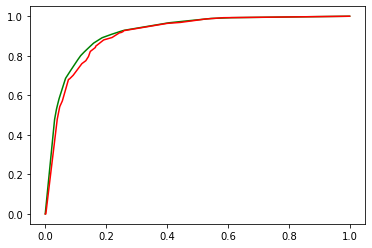

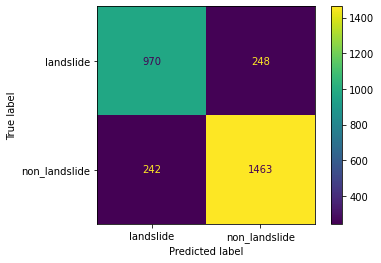

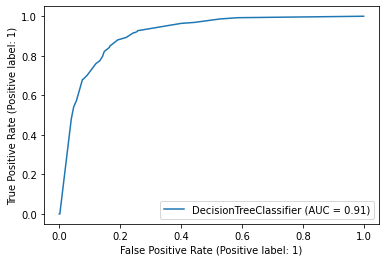

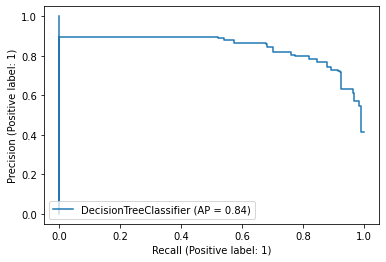

Feature Importance
	Place	Feature	%
	 1	& elevation\_mean	& 58.17 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 33.49 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 3.11 \\ \hline
	 4	& rock\_period	& 1.97 \\ \hline
	 5	& procurv\_mean	& 1.25 \\ \hline
	 6	& soil\_rec\_symbol	& 1.2 \\ \hline
	 7	& soil\_rec\_c\_\_tex\_sub	& 0.24 \\ \hline
	 8	& soil\_tax	& 0.21 \\ \hline
	 9	& aspect\_mean	& 0.2 \\ \hline
	 10	& soil\_rec\_tex\_sup	& 0.16 \\ \hline
	 11	& slope\_mean	& 0.0 \\ \hline
	 12	& placurv\_mean	& 0.0 \\ \hline
	 13	& soil\_rec\_mat\_origin	& 0.0 \\ \hline
	 14	& soil\_rec\_sew\_class	& 0.0 \\ \hline
	 15	& soil\_rec\_c\_tex\_sup	& 0.0 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 0.0 \\ \hline
	 17	& soil\_use	& 0.0 \\ \hline
	 18	& rock\_type	& 0.0 \\ \hline


(0.8323640095791994,
 0.9094860089854527,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.86      0.86      0.86      1705\n    landslide       0.80      0.80      0.80      1218\n\n     accuracy                           0.83      2923\n    macro avg       0.83      0.83      0.83      2923\n weighted avg       0.83      0.83      0.83      2923\n',
 {'elevation_mean': 58.17,
  'precipitation_mm_last_7_days': 33.49,
  'soil_rec_tex_sub': 3.11,
  'rock_period': 1.97,
  'procurv_mean': 1.25,
  'soil_rec_symbol': 1.2,
  'soil_rec_c__tex_sub': 0.24,
  'soil_tax': 0.21,
  'aspect_mean': 0.2,
  'soil_rec_tex_sup': 0.16,
  'slope_mean': 0.0,
  'placurv_mean': 0.0,
  'soil_rec_mat_origin': 0.0,
  'soil_rec_sew_class': 0.0,
  'soil_rec_c_tex_sup': 0.0,
  'soil_rec_risk_eros': 0.0,
  'soil_use': 0.0,
  'rock_type': 0.0})

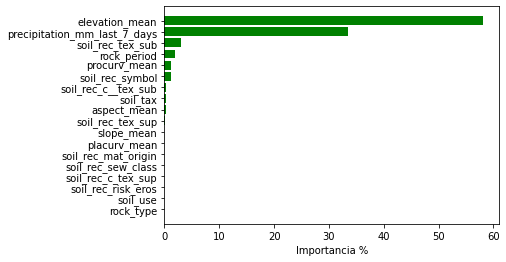

In [294]:
train_with_model_train_test_method(clf=clf_dt,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


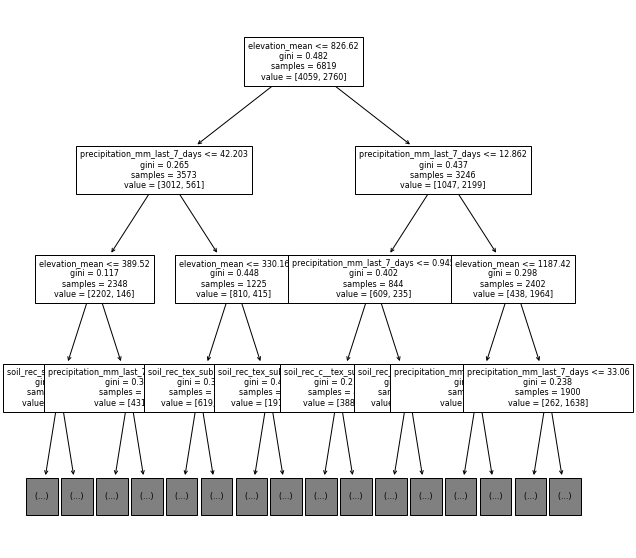

In [295]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_dt, fontsize=8, feature_names=features,max_depth=3)
plt.show()


#### Tune Parameters

In [255]:
clf_dt = DecisionTreeClassifier(random_state=0)
model = "DecisionTree"

In [26]:
from sklearn.model_selection import RandomizedSearchCV
params = {
# "n_components" = list(range(1,X_train.shape[1]+1,1)),

"criterion" : ['gini', 'entropy'],
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12],

#  "n_estimators":[50,100,200,300,400],

}
rs_model=RandomizedSearchCV(clf_dt,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [27]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12]},
                   scoring='roc_auc', verbose=3)

In [28]:
rs_model.best_estimator_


DecisionTreeClassifier(max_depth=5, random_state=0)

In [296]:
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=0)



Model RandomForest 
Scores
Accuracy score Test: 0.8323640095791994
RocAuc score Test: 0.9094860089854527
Accuracy score Train: 0.8507112479835753
RocAuc score Train: 0.9197355759789483
Confusion Matrix
[[ 970  248]
 [ 242 1463]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.86      0.86      1705
    landslide       0.80      0.80      0.80      1218

     accuracy                           0.83      2923
    macro avg       0.83      0.83      0.83      2923
 weighted avg       0.83      0.83      0.83      2923

 Roc Curve


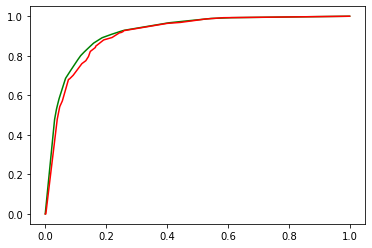

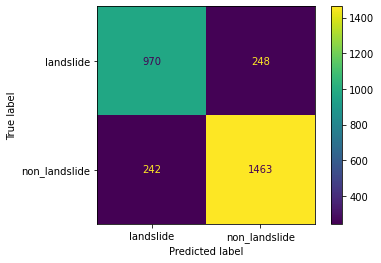

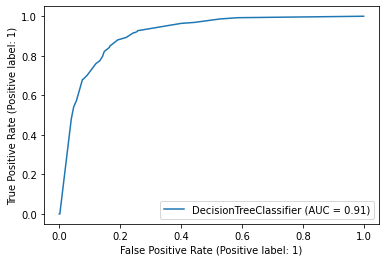

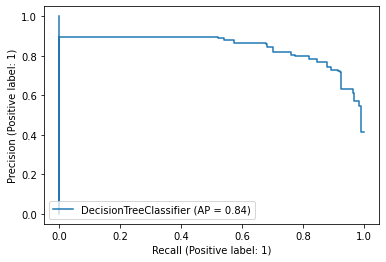

Feature Importance
	Place	Feature	%
	 1	& elevation\_mean	& 58.17 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 33.49 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 3.11 \\ \hline
	 4	& rock\_period	& 1.97 \\ \hline
	 5	& procurv\_mean	& 1.25 \\ \hline
	 6	& soil\_rec\_symbol	& 1.2 \\ \hline
	 7	& soil\_rec\_c\_\_tex\_sub	& 0.24 \\ \hline
	 8	& soil\_tax	& 0.21 \\ \hline
	 9	& aspect\_mean	& 0.2 \\ \hline
	 10	& soil\_rec\_tex\_sup	& 0.16 \\ \hline
	 11	& slope\_mean	& 0.0 \\ \hline
	 12	& placurv\_mean	& 0.0 \\ \hline
	 13	& soil\_rec\_mat\_origin	& 0.0 \\ \hline
	 14	& soil\_rec\_sew\_class	& 0.0 \\ \hline
	 15	& soil\_rec\_c\_tex\_sup	& 0.0 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 0.0 \\ \hline
	 17	& soil\_use	& 0.0 \\ \hline
	 18	& rock\_type	& 0.0 \\ \hline


(0.8323640095791994,
 0.9094860089854527,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.86      0.86      0.86      1705\n    landslide       0.80      0.80      0.80      1218\n\n     accuracy                           0.83      2923\n    macro avg       0.83      0.83      0.83      2923\n weighted avg       0.83      0.83      0.83      2923\n',
 {'elevation_mean': 58.17,
  'precipitation_mm_last_7_days': 33.49,
  'soil_rec_tex_sub': 3.11,
  'rock_period': 1.97,
  'procurv_mean': 1.25,
  'soil_rec_symbol': 1.2,
  'soil_rec_c__tex_sub': 0.24,
  'soil_tax': 0.21,
  'aspect_mean': 0.2,
  'soil_rec_tex_sup': 0.16,
  'slope_mean': 0.0,
  'placurv_mean': 0.0,
  'soil_rec_mat_origin': 0.0,
  'soil_rec_sew_class': 0.0,
  'soil_rec_c_tex_sup': 0.0,
  'soil_rec_risk_eros': 0.0,
  'soil_use': 0.0,
  'rock_type': 0.0})

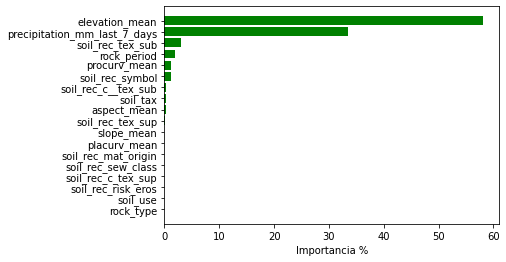

In [297]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf_dt,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With RandomForestClassifier

In [298]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier( random_state=0)
model = "RandomForest"


##### Train First Approach

####

In [33]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'bootstrap': [True, False],
 'max_depth': [2,3,4,6,6,7,8,9,10,20,30],
 "criterion" : ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200,300, 400, 600, 800]
}
rs_model=RandomizedSearchCV(clf_rf,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [34]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 6, 6, 7, 8, 9,
                                                      10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         600, 800]},
                   scoring='roc_auc', verbose=3)

In [35]:
rs_model.best_score_

0.9471417134043513

In [36]:
rs_model.best_estimator_


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       n_estimators=400, random_state=0)

Model RandomForest 
Scores
Accuracy score Test: 0.8905234348272323
RocAuc score Test: 0.950867004704602
Accuracy score Train: 1.0
RocAuc score Train: 1.0
Confusion Matrix
[[1055  163]
 [ 157 1548]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.91      0.91      1705
    landslide       0.87      0.87      0.87      1218

     accuracy                           0.89      2923
    macro avg       0.89      0.89      0.89      2923
 weighted avg       0.89      0.89      0.89      2923

 Roc Curve


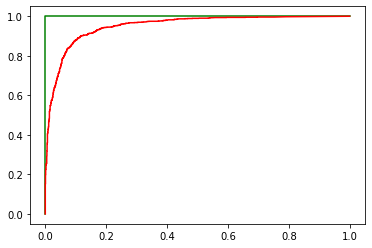

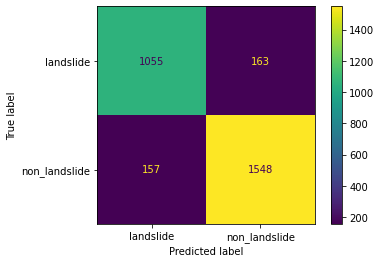

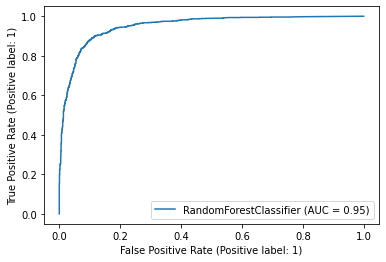

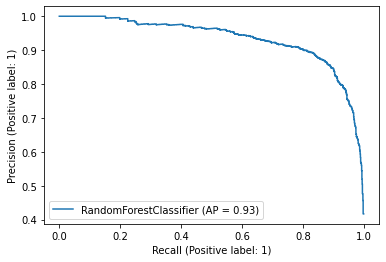

Feature Importance
	Place	Feature	%
	 1	& precipitation\_mm\_last\_7\_days	& 21.46 \\ \hline
	 2	& elevation\_mean	& 20.28 \\ \hline
	 3	& slope\_mean	& 6.29 \\ \hline
	 4	& soil\_rec\_tex\_sub	& 5.64 \\ \hline
	 5	& procurv\_mean	& 5.57 \\ \hline
	 6	& aspect\_mean	& 5.09 \\ \hline
	 7	& rock\_period	& 5.01 \\ \hline
	 8	& placurv\_mean	& 4.98 \\ \hline
	 9	& soil\_rec\_tex\_sup	& 3.64 \\ \hline
	 10	& soil\_rec\_symbol	& 3.58 \\ \hline
	 11	& soil\_rec\_mat\_origin	& 3.47 \\ \hline
	 12	& soil\_tax	& 3.31 \\ \hline
	 13	& rock\_type	& 3.29 \\ \hline
	 14	& soil\_use	& 2.88 \\ \hline
	 15	& soil\_rec\_c\_\_tex\_sub	& 2.2 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 1.51 \\ \hline
	 17	& soil\_rec\_c\_tex\_sup	& 1.1 \\ \hline
	 18	& soil\_rec\_sew\_class	& 0.72 \\ \hline


(0.8905234348272323,
 0.950867004704602,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.90      0.91      0.91      1705\n    landslide       0.87      0.87      0.87      1218\n\n     accuracy                           0.89      2923\n    macro avg       0.89      0.89      0.89      2923\n weighted avg       0.89      0.89      0.89      2923\n',
 {'precipitation_mm_last_7_days': 21.46,
  'elevation_mean': 20.28,
  'slope_mean': 6.29,
  'soil_rec_tex_sub': 5.64,
  'procurv_mean': 5.57,
  'aspect_mean': 5.09,
  'rock_period': 5.01,
  'placurv_mean': 4.98,
  'soil_rec_tex_sup': 3.64,
  'soil_rec_symbol': 3.58,
  'soil_rec_mat_origin': 3.47,
  'soil_tax': 3.31,
  'rock_type': 3.29,
  'soil_use': 2.88,
  'soil_rec_c__tex_sub': 2.2,
  'soil_rec_risk_eros': 1.51,
  'soil_rec_c_tex_sup': 1.1,
  'soil_rec_sew_class': 0.72})

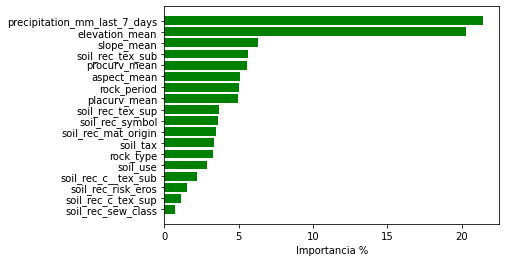

In [299]:
# Train Not Using oversample
clf_rf= RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       n_estimators=400, random_state=0)
train_with_model_train_test_method(clf=clf_rf,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


### Train With AdaBoostClassifer

In [39]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier( random_state=0)
model = "AdaBoost"


In [ ]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_adaboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


#### Tune Parameters

In [300]:
clf_adaboost =AdaBoostClassifier( random_state=0)
model = "Adaboost"

In [42]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30,0.5,1],


 "n_estimators":[50,100,200,300,400,500],
 
}
rs_model=RandomizedSearchCV(clf_adaboost,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [43]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [45]:
rs_model.best_estimator_


AdaBoostClassifier(learning_rate=0.3, n_estimators=500, random_state=0)

In [301]:
clf_adaboost = AdaBoostClassifier(learning_rate=0.3, n_estimators=500, random_state=0)


Model Adaboost 
Scores
Accuracy score Test: 0.8621279507355457
RocAuc score Test: 0.9322717882784625
Accuracy score Train: 0.867282592755536
RocAuc score Train: 0.9427771886414518
Confusion Matrix
[[1028  190]
 [ 213 1492]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.89      0.88      0.88      1705
    landslide       0.83      0.84      0.84      1218

     accuracy                           0.86      2923
    macro avg       0.86      0.86      0.86      2923
 weighted avg       0.86      0.86      0.86      2923

 Roc Curve


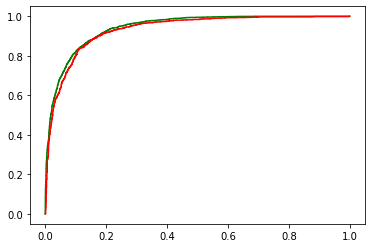

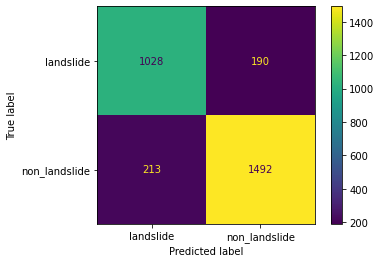

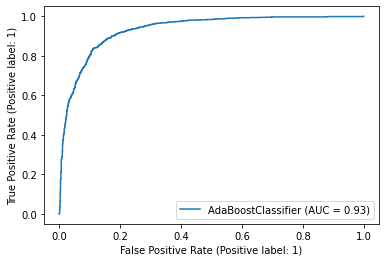

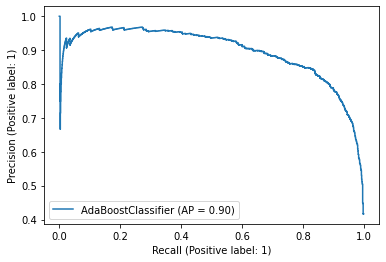

Feature Importance
	Place	Feature	%
	 1	& rock\_period	& 16.6 \\ \hline
	 2	& soil\_rec\_symbol	& 15.4 \\ \hline
	 3	& elevation\_mean	& 14.2 \\ \hline
	 4	& soil\_rec\_mat\_origin	& 10.4 \\ \hline
	 5	& soil\_rec\_tex\_sub	& 7.4 \\ \hline
	 6	& precipitation\_mm\_last\_7\_days	& 7.2 \\ \hline
	 7	& procurv\_mean	& 6.8 \\ \hline
	 8	& aspect\_mean	& 4.4 \\ \hline
	 9	& slope\_mean	& 3.6 \\ \hline
	 10	& placurv\_mean	& 3.6 \\ \hline
	 11	& soil\_use	& 2.8 \\ \hline
	 12	& soil\_tax	& 2.6 \\ \hline
	 13	& soil\_rec\_tex\_sup	& 1.4 \\ \hline
	 14	& soil\_rec\_sew\_class	& 1.2 \\ \hline
	 15	& soil\_rec\_c\_\_tex\_sub	& 0.8 \\ \hline
	 16	& soil\_rec\_risk\_eros	& 0.6 \\ \hline
	 17	& rock\_type	& 0.6 \\ \hline
	 18	& soil\_rec\_c\_tex\_sup	& 0.4 \\ \hline


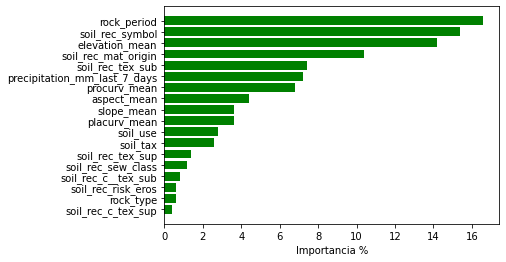

In [302]:
# Train  Using oversample
p = train_with_model_train_test_method(clf=clf_adaboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With XGBoostClassifer

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import xgboost as xgb
clf_xgboost = xgb.XGBClassifier(random_state=0,)
model = "XGBoost"


#### Train Test Method Not Using Oversample

[04:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost 
Scores
Accuracy score Test: 0.8717071501881628
RocAuc score Test: 0.9432698187981837
Accuracy score Train: 0.9944273353864203
RocAuc score Train: 0.9998028178569006
Confusion Matrix
[[1036  182]
 [ 193 1512]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.89      0.89      0.89      1705
    landslide       0.84      0.85      0.85      1218

     accuracy                           0.87      2923
    macro avg       0.87      0.87      0.87      2923
 weighted avg       0.87      0.87      0.87      2923

 Roc Curve


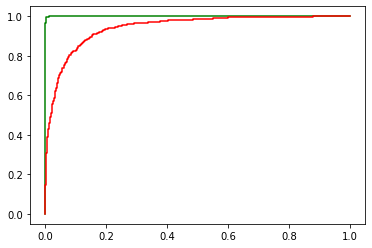

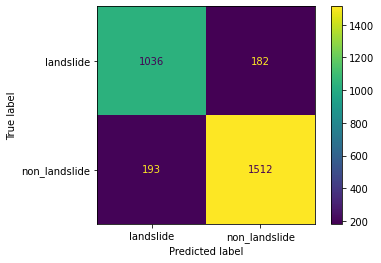

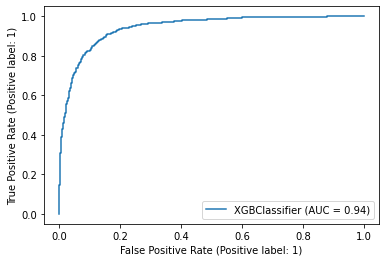

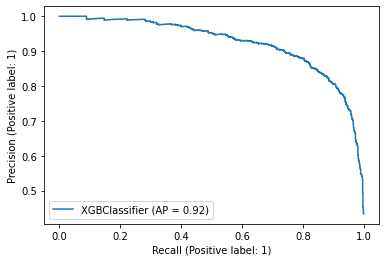

Feature Importance
	Place	Feature	%
	 1	& elevation\_mean	& 18.5 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 13.2 \\ \hline
	 3	& soil\_rec\_c\_\_tex\_sub	& 6.9 \\ \hline
	 4	& soil\_rec\_tex\_sub	& 5.48 \\ \hline
	 5	& rock\_period	& 5.43 \\ \hline
	 6	& soil\_rec\_c\_tex\_sup	& 5.15 \\ \hline
	 7	& soil\_tax	& 5.02 \\ \hline
	 8	& soil\_rec\_mat\_origin	& 4.71 \\ \hline
	 9	& soil\_rec\_symbol	& 4.59 \\ \hline
	 10	& rock\_type	& 4.56 \\ \hline
	 11	& soil\_rec\_tex\_sup	& 4.34 \\ \hline
	 12	& soil\_rec\_risk\_eros	& 4.09 \\ \hline
	 13	& soil\_use	& 3.97 \\ \hline
	 14	& procurv\_mean	& 3.03 \\ \hline
	 15	& placurv\_mean	& 2.87 \\ \hline
	 16	& soil\_rec\_sew\_class	& 2.77 \\ \hline
	 17	& slope\_mean	& 2.73 \\ \hline
	 18	& aspect\_mean	& 2.67 \\ \hline


(0.8717071501881628,
 0.9432698187981837,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.89      0.89      0.89      1705\n    landslide       0.84      0.85      0.85      1218\n\n     accuracy                           0.87      2923\n    macro avg       0.87      0.87      0.87      2923\n weighted avg       0.87      0.87      0.87      2923\n',
 {'elevation_mean': 18.5,
  'precipitation_mm_last_7_days': 13.2,
  'soil_rec_c__tex_sub': 6.9,
  'soil_rec_tex_sub': 5.48,
  'rock_period': 5.43,
  'soil_rec_c_tex_sup': 5.15,
  'soil_tax': 5.02,
  'soil_rec_mat_origin': 4.71,
  'soil_rec_symbol': 4.59,
  'rock_type': 4.56,
  'soil_rec_tex_sup': 4.34,
  'soil_rec_risk_eros': 4.09,
  'soil_use': 3.97,
  'procurv_mean': 3.03,
  'placurv_mean': 2.87,
  'soil_rec_sew_class': 2.77,
  'slope_mean': 2.73,
  'aspect_mean': 2.67})

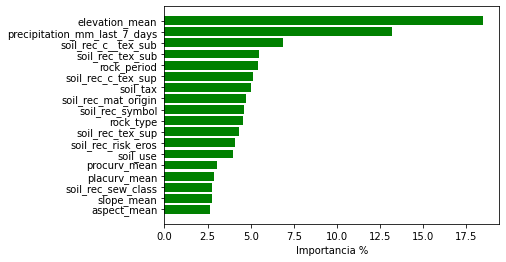

In [53]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_xgboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


#### Tune Parameters

In [303]:
import xgboost as xgb
clf_xgboost = xgb.XGBClassifier(random_state=0 )
model = "XGBoost"

In [305]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12,15,18,20],
 "min_child_weight": [ 1, 3, 5, 7 ],
 "n_estimators":[50,100,200,300,400],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(clf_xgboost,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [56]:
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[04:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [57]:
rs_model.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [306]:
clf_xgboost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=3, missing=np.NaN, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

[17:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBoost 
Scores
Accuracy score Test: 0.8867601778994184
RocAuc score Test: 0.948595601654556
Accuracy score Train: 1.0
RocAuc score Train: 1.0
Confusion Matrix
[[1051  167]
 [ 164 1541]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.90      0.90      0.90      1705
    landslide       0.87      0.86      0.86      1218

     accuracy                           0.89      2923
    macro avg       0.88      0.88      0.88      2923
 weighted avg       0.89      0.89      0.89      2923

 Roc Curve


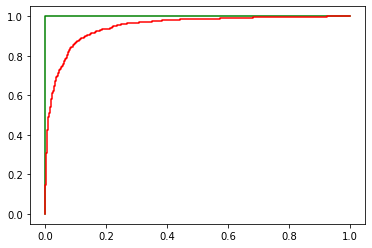

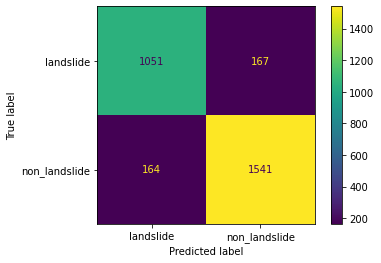

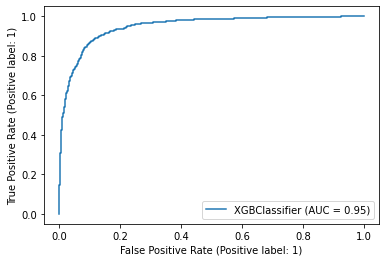

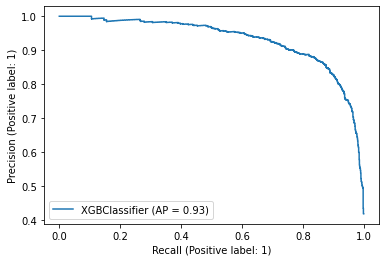

Feature Importance
	Place	Feature	%
	 1	& rock\_type	& 23.96 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 8.72 \\ \hline
	 3	& elevation\_mean	& 7.07 \\ \hline
	 4	& soil\_tax	& 6.62 \\ \hline
	 5	& soil\_rec\_tex\_sup	& 6.48 \\ \hline
	 6	& soil\_use	& 6.4 \\ \hline
	 7	& soil\_rec\_tex\_sub	& 6.38 \\ \hline
	 8	& soil\_rec\_risk\_eros	& 5.59 \\ \hline
	 9	& soil\_rec\_c\_tex\_sup	& 5.47 \\ \hline
	 10	& rock\_period	& 4.04 \\ \hline
	 11	& soil\_rec\_c\_\_tex\_sub	& 3.8 \\ \hline
	 12	& soil\_rec\_symbol	& 3.25 \\ \hline
	 13	& soil\_rec\_mat\_origin	& 2.56 \\ \hline
	 14	& soil\_rec\_sew\_class	& 2.19 \\ \hline
	 15	& aspect\_mean	& 2.03 \\ \hline
	 16	& procurv\_mean	& 1.97 \\ \hline
	 17	& placurv\_mean	& 1.77 \\ \hline
	 18	& slope\_mean	& 1.69 \\ \hline


(0.8867601778994184,
 0.948595601654556,
 '               precision    recall  f1-score   support\n\nnon_landslide       0.90      0.90      0.90      1705\n    landslide       0.87      0.86      0.86      1218\n\n     accuracy                           0.89      2923\n    macro avg       0.88      0.88      0.88      2923\n weighted avg       0.89      0.89      0.89      2923\n',
 {'rock_type': 23.96,
  'precipitation_mm_last_7_days': 8.72,
  'elevation_mean': 7.07,
  'soil_tax': 6.62,
  'soil_rec_tex_sup': 6.48,
  'soil_use': 6.4,
  'soil_rec_tex_sub': 6.38,
  'soil_rec_risk_eros': 5.59,
  'soil_rec_c_tex_sup': 5.47,
  'rock_period': 4.04,
  'soil_rec_c__tex_sub': 3.8,
  'soil_rec_symbol': 3.25,
  'soil_rec_mat_origin': 2.56,
  'soil_rec_sew_class': 2.19,
  'aspect_mean': 2.03,
  'procurv_mean': 1.97,
  'placurv_mean': 1.77,
  'slope_mean': 1.69})

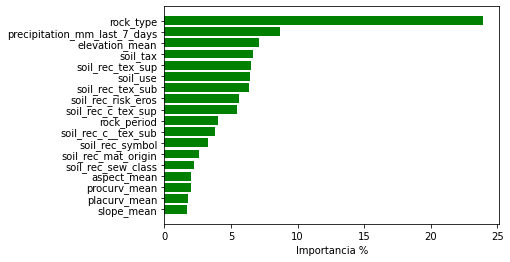

In [307]:
# Train  Using oversample
train_with_model_train_test_method(clf=clf_xgboost,model=model,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,using_oversample=False)

### Train With Logistic Regression

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression(random_state=0,)
model = "logistic_regression"


Model XGBoost 
Scores
Accuracy score Test: 0.7991789257612042
RocAuc score Test: 0.8910838883030207
Accuracy score Train: 0.798797477636017
RocAuc score Train: 0.8827706188787843
Confusion Matrix
[[ 894  324]
 [ 263 1442]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.82      0.85      0.83      1705
    landslide       0.77      0.73      0.75      1218

     accuracy                           0.80      2923
    macro avg       0.79      0.79      0.79      2923
 weighted avg       0.80      0.80      0.80      2923

 Roc Curve


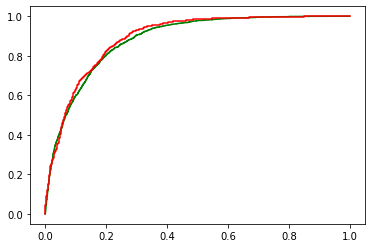

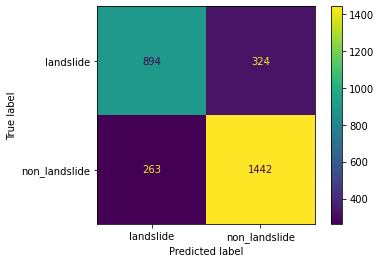

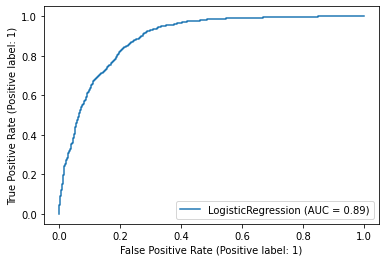

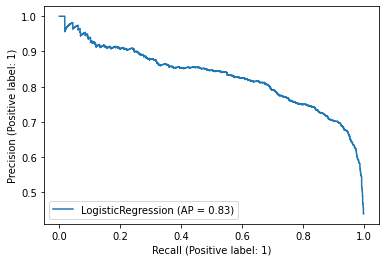

Feature Importance


UnboundLocalError: local variable 'feature_importances_dict_sorted' referenced before assignment

In [309]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_logistic_regression,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test)


Feature Importance
	Place	Feature	%
	 1	& precipitation\_mm\_last\_7\_days	& 103.06 \\ \hline
	 2	& elevation\_mean	& 86.13 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 38.69 \\ \hline
	 4	& soil\_rec\_c\_\_tex\_sub	& 29.38 \\ \hline
	 5	& soil\_use	& 25.32 \\ \hline
	 6	& soil\_rec\_tex\_sup	& 18.18 \\ \hline
	 7	& slope\_mean	& 10.34 \\ \hline
	 8	& procurv\_mean	& 9.26 \\ \hline
	 9	& placurv\_mean	& 8.83 \\ \hline
	 10	& soil\_rec\_c\_tex\_sup	& 6.9 \\ \hline
	 11	& soil\_rec\_risk\_eros	& 0.6 \\ \hline
	 12	& soil\_rec\_sew\_class	& -3.26 \\ \hline
	 13	& aspect\_mean	& -8.91 \\ \hline
	 14	& soil\_rec\_mat\_origin	& -13.93 \\ \hline
	 15	& soil\_rec\_symbol	& -20.06 \\ \hline
	 16	& soil\_tax	& -23.23 \\ \hline
	 17	& rock\_period	& -25.92 \\ \hline
	 18	& rock\_type	& -38.25 \\ \hline


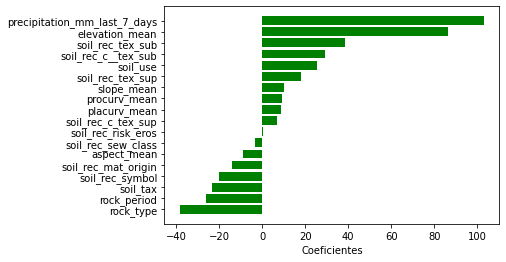

In [310]:
try:
    print("Feature Importance")
    importances = clf_logistic_regression.coef_[0]
    feature_importances_dict = dict()
    for x in range(len(importances)):
        feature_importances_dict[features[x]] = round(importances[x]*100,2)
    feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
    print("\tPlace\tFeature\t%")
    index = 1
    for key in feature_importances_dict_sorted.keys():
        # if(feature_importances_dict[key]>0.5):
        print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
        index +=1
    importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
    featuress = reversed(feature_importances_dict_sorted.keys())
    plt.figure(1)
    plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
    plt.yticks(range(len(feature_importances_dict)), featuress)
    plt.xlabel('Coeficientes')
except:
    pass


### Train With SVM

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
from sklearn.svm import SVC
clf_svc = SVC(random_state=0,probability=True)
model = "SVM"


In [ ]:
# Train Not Using oversample
train_with_model_train_test_method(clf=clf_svc,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test)


#### Tune Parameters

In [312]:
from sklearn.model_selection import RandomizedSearchCV
params = {
         'C':[0.1,1,10,100,1000],
         'kernel':['rbf','poly','sigmoid','linear'],
         'degree':[1,2,3,4,5,6]}
rs_model=RandomizedSearchCV(clf_svc,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
rs_model.fit(X_train_sc,y_train)

In [533]:
rs_model.best_estimator_


SVC(C=0.1, degree=2, probability=True, random_state=0)

In [314]:
clf_svc = SVC(C=0.1, degree=2, probability=True, random_state=0)

Model SVM 
Scores
Accuracy score Test: 0.8433116660964762
RocAuc score Test: 0.9195852534562211
Accuracy score Train: 0.8373661827247397
RocAuc score Train: 0.9172299166996939
Confusion Matrix
[[ 981  237]
 [ 221 1484]]
Classification Report
               precision    recall  f1-score   support

non_landslide       0.86      0.87      0.87      1705
    landslide       0.82      0.81      0.81      1218

     accuracy                           0.84      2923
    macro avg       0.84      0.84      0.84      2923
 weighted avg       0.84      0.84      0.84      2923

 Roc Curve


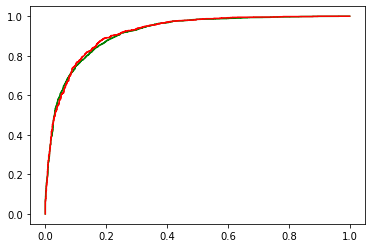

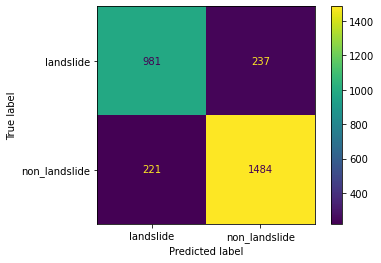

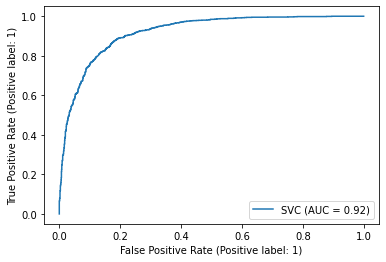

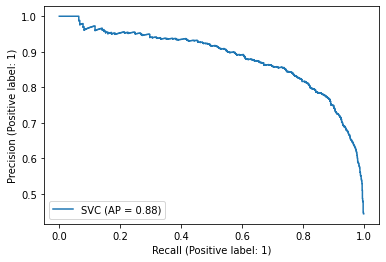

Feature Importance


UnboundLocalError: local variable 'feature_importances_dict_sorted' referenced before assignment

In [315]:
train_with_model_train_test_method(clf=clf_svc,model=model,X_train=X_train_sc, y_train=y_train, X_test=X_test_sc, y_test=y_test,using_oversample=False)

In [316]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf_svc, X_test_sc, y_test)


In [317]:
perm_importance.importances_mean

array([ 0.1050975 ,  0.00205269, -0.00020527, -0.00136846,  0.00383168,
        0.05925419,  0.00643175,  0.00287376,  0.0056791 ,  0.00068423,
        0.00184742,  0.00102634,  0.01170031,  0.00834759,  0.00177899,
        0.00458433,  0.00396853,  0.00964762])

Feature Importance
	Place	Feature	%
	 1	& elevation\_mean	& 10.51 \\ \hline
	 2	& precipitation\_mm\_last\_7\_days	& 5.93 \\ \hline
	 3	& soil\_rec\_tex\_sub	& 1.17 \\ \hline
	 4	& rock\_period	& 0.96 \\ \hline
	 5	& soil\_rec\_c\_\_tex\_sub	& 0.83 \\ \hline
	 6	& soil\_tax	& 0.64 \\ \hline
	 7	& soil\_rec\_mat\_origin	& 0.57 \\ \hline
	 8	& soil\_use	& 0.46 \\ \hline
	 9	& rock\_type	& 0.4 \\ \hline
	 10	& procurv\_mean	& 0.38 \\ \hline
	 11	& soil\_rec\_symbol	& 0.29 \\ \hline
	 12	& slope\_mean	& 0.21 \\ \hline
	 13	& soil\_rec\_tex\_sup	& 0.18 \\ \hline
	 14	& soil\_rec\_risk\_eros	& 0.18 \\ \hline
	 15	& soil\_rec\_c\_tex\_sup	& 0.1 \\ \hline
	 16	& soil\_rec\_sew\_class	& 0.07 \\ \hline
	 17	& aspect\_mean	& -0.02 \\ \hline
	 18	& placurv\_mean	& -0.14 \\ \hline


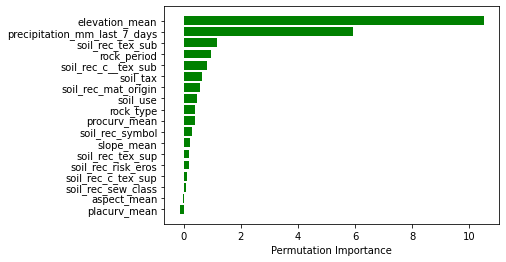

In [318]:
try:
    print("Feature Importance")
    importances = perm_importance.importances_mean
    feature_importances_dict = dict()
    for x in range(len(importances)):
        feature_importances_dict[features[x]] = round(importances[x]*100,2)
    feature_importances_dict_sorted = {k: v for k, v in sorted(feature_importances_dict.items(), key=lambda item: item[1],reverse=True)}
    print("\tPlace\tFeature\t%")
    index = 1
    for key in feature_importances_dict_sorted.keys():
        # if(feature_importances_dict[key]>0.5):
        print("\t {}\t& {}\t& {} \\\\ \\hline".format(index,key.replace("_","\\_"),feature_importances_dict[key]))
        index +=1
    importances = [feature_importances_dict_sorted[x] for x in reversed(feature_importances_dict_sorted.keys())]
    featuress = reversed(feature_importances_dict_sorted.keys())
    plt.figure(1)
    plt.barh(range(len(feature_importances_dict)), importances, color='g', align='center')
    plt.yticks(range(len(feature_importances_dict)), featuress)
    plt.xlabel('Permutation Importance')
except:
    pass

### Print Plot with All Roc Auc Scores

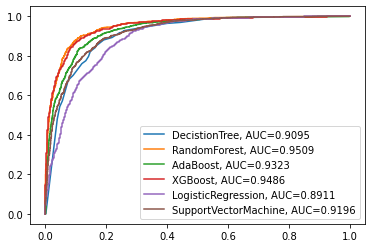

In [75]:
#set up plotting area
plt.figure(0).clf()

#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    model = models_1[i]
    model_name = model_names_1[i]
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",

]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    model = models_2[i]
    model_name = model_names_2[i]
    y_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))

#print legend
plt.legend()

## Save Models and Create Output for Guatemala Points

In [86]:
PATH_INPUT_GUATEMALA_POINTS = './data_merged_all_gt_map_final.csv'


In [87]:
# We read Excel with Guatemala Point to do susceptibility
guatemala_points = pd.read_csv(PATH_INPUT_GUATEMALA_POINTS,index_col=0)



In [88]:
training2 = pd.read_csv(PATH_INPUT_CSV,index_col=0)

In [89]:
# Preprocessing Label Encoder
df = training2
# We use a label encoder for each of the columns of categories
features_string = [ 
 'soil_tax',
#  'satellite',
 'soil_rec_symbol',
 'soil_rec_mat_origin',
 'soil_rec_sew_class',
 'soil_rec_tex_sup',
 'soil_rec_c_tex_sup',
 'soil_rec_tex_sub',
 'soil_rec_c__tex_sub',
 'soil_rec_risk_eros',
 'fis_nomr',
 'soil_use',
 'rock_geo',
 'rock_type',
 'rock_period']
for feature in features_string:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    guatemala_points[feature] = le.transform(guatemala_points[feature])
    training2[feature] = le.transform(training2[feature])

In [90]:
for col in ['elevation','slope','aspect','procurv','placurv']:
    guatemala_points['{}_mean'.format(col)] = (
        guatemala_points['{}_1'.format(col)] + 
        guatemala_points['{}_2'.format(col)] + 
        guatemala_points['{}_3'.format(col)] + 
        guatemala_points['{}_4'.format(col)] + 
        guatemala_points['{}_5'.format(col)] + 
        guatemala_points['{}_6'.format(col)] + 
        guatemala_points['{}_7'.format(col)] + 
        guatemala_points['{}_8'.format(col)] + 
        guatemala_points['{}_9'.format(col)] + 
        guatemala_points['{}_10'.format(col)] + 
        guatemala_points['{}_11'.format(col)] + 
        guatemala_points['{}_12'.format(col)] + 
        guatemala_points['{}_13'.format(col)] + 
        guatemala_points['{}_14'.format(col)] + 
        guatemala_points['{}_15'.format(col)] + 
        guatemala_points['{}_16'.format(col)] + 
        guatemala_points['{}_17'.format(col)] + 
        guatemala_points['{}_18'.format(col)] + 
        guatemala_points['{}_19'.format(col)] + 
        guatemala_points['{}_20'.format(col)] + 
        guatemala_points['{}_21'.format(col)] + 
        guatemala_points['{}_22'.format(col)] + 
        guatemala_points['{}_23'.format(col)] + 
        guatemala_points['{}_24'.format(col)] + 
        guatemala_points['{}_25'.format(col)]  
    )/25

In [91]:
X_guatemala = guatemala_points[features]
X_guatemala_sc = sc.transform(X_guatemala)


In [92]:
def predict_with_model(clf,X):
    prediction = clf.predict(X)
    prediction_prob = clf.predict_proba(X)
    return prediction, prediction_prob

In [93]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_guatemala)
    guatemala_points['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_guatemala_sc)
    guatemala_points['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [95]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    guatemala_points[algoritm] = guatemala_points.apply(lambda x: class_function(x,feat), axis=1)

In [96]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    guatemala_points[algoritm] = guatemala_points.apply(lambda x: class_function(x,feat), axis=1)

In [101]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class5"
    print(f"Counter prediction {name}: {Counter(guatemala_points[algoritm])}")

Counter prediction DecistionTree: Counter({'Very Low': 49302, 'Very High': 22649, 'Low': 12325, 'High': 10355, 'Medium': 2348})
Counter prediction RandomForest: Counter({'Very Low': 49947, 'Low': 14337, 'Medium': 12010, 'High': 10828, 'Very High': 9857})
Counter prediction AdaBoost: Counter({'Medium': 96979})
Counter prediction XGBoost: Counter({'Very Low': 59537, 'Very High': 16064, 'Low': 8127, 'High': 6893, 'Medium': 6358})
Counter prediction LogisticRegression: Counter({'Very Low': 46803, 'Low': 16691, 'High': 14205, 'Medium': 13654, 'Very High': 5626})
Counter prediction SupportVectorMachine: Counter({'Very Low': 53382, 'Low': 14630, 'Medium': 9892, 'High': 9770, 'Very High': 9305})


In [102]:
#TRAIN TEST

In [103]:
X_test_final = X_test.copy(True)
X_train_final = X_train.copy(True)

In [104]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_train)
    X_train_final['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_train_sc)
    X_train_final['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [105]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    X_train_final[algoritm] = X_train_final.apply(lambda x: class_function(x,feat), axis=1)

In [106]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    X_train_final[algoritm] = X_train_final.apply(lambda x: class_function(x,feat), axis=1)

In [107]:
X_train_final['landslide'] = y_train

In [108]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_train_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_mean  slope_mean  aspect_mean  \
landslide DecistionTree_class3                                            
0         High                             274         274          274   
          Low                             3301        3301         3301   
          Medium                           484         484          484   
1         High                            1899        1899         1899   
          Low                              300         300          300   
          Medium                           561         561          561   

                                placurv_mean  procurv_mean  \
landslide DecistionTree_class3                               
0         High                           274           274   
          Low                           3301          3301   
          Medium                         484           484   
1         High                          1899          18

In [109]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_train_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_mean  slope_mean  aspect_mean  \
landslide DecistionTree_class3                                            
0         High                             274         274          274   
          Low                             3301        3301         3301   
          Medium                           484         484          484   
1         High                            1899        1899         1899   
          Low                              300         300          300   
          Medium                           561         561          561   

                                placurv_mean  procurv_mean  \
landslide DecistionTree_class3                               
0         High                           274           274   
          Low                           3301          3301   
          Medium                         484           484   
1         High                          1899          18

In [110]:
# X_test_final

In [111]:
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    pred, pred_prob = predict_with_model(models_1[i],X_test)
    X_test_final['{}_prediction_prob'.format(model_names_1[i])] = pred_prob[:,1]

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",
]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    pred, pred_prob = predict_with_model(models_2[i],X_test_sc)
    X_test_final['{}_prediction_prob'.format(model_names_2[i])] = pred_prob[:,1]


In [112]:
names = model_names_1 + model_names_2
low = [0.0,0.33]
medium = [0.33,0.66]
high = [0.66,1]
def between(x,low,high):
    if (x>=low and x<=high):
        return True
    return False
def class_function(row,x):
    if between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    feat = name + '_prediction_prob' 
    X_test_final[algoritm] = X_test_final.apply(lambda x: class_function(x,feat), axis=1)

In [113]:
names = model_names_1 + model_names_2
verylow = [0.0,0.2]
low = [0.2,0.4]
medium = [0.4,0.6]
high = [0.6,0.8]
veryhigh = [0.8,1]
def between(x,l,h):
    if (x>=l and x<=h):
        return True
    return False
def class_function(row,x):
    if between(row[x],verylow[0],verylow[1]):
         return 'Very Low'
    elif between(row[x],low[0],low[1]):
        return 'Low'
    elif between(row[x],medium[0],medium[1]):
        return 'Medium'
    elif between(row[x],high[0],high[1]):
        return 'High'
    elif between(row[x],veryhigh[0],veryhigh[1]):
        return 'Very High'
for name in names:
    algoritm = name + "_" + "class5"
    feat = name + '_prediction_prob' 
    X_test_final[algoritm] = X_test_final.apply(lambda x: class_function(x,feat), axis=1)

In [114]:
X_test_final['landslide'] = y_test

In [115]:
for name in names:
    algoritm = name.split("_")[0] + "_" + "class3"
    print(f"Counter prediction {name}")
    print(f"{X_test_final.groupby(['landslide',algoritm]).count()}")

Counter prediction DecistionTree
                                elevation_mean  slope_mean  aspect_mean  \
landslide DecistionTree_class3                                            
0         High                             135         135          135   
          Low                             1378        1378         1378   
          Medium                           192         192          192   
1         High                             831         831          831   
          Low                              146         146          146   
          Medium                           241         241          241   

                                placurv_mean  procurv_mean  \
landslide DecistionTree_class3                               
0         High                           135           135   
          Low                           1378          1378   
          Medium                         192           192   
1         High                           831           8

In [134]:
X_train_final['XGBoost_class5'].value_counts()

Very Low     4044
Very High    2729
High           31
Low            15
Name: XGBoost_class5, dtype: int64

In [118]:
guatemala_points.to_csv('./mean_result/gt_points.csv')
X_train_final.to_csv('./mean_result/X_train.csv')
X_test_final.to_csv('./mean_result/X_test.csv')

In [119]:
X_train_final['train'] = 1
X_test_final['train'] = 0

In [246]:
training2 = pd.read_csv(PATH_INPUT_CSV,index_col=0)
X_val = pd.concat([X_train_final ,X_test_final],ignore_index=False)
X_val = pd.merge(
    X_val,
    training2[['latitude','longitude']],
    how="inner",
    left_index=True,
    right_index=True)
X_val.to_csv('./results/X_val_all.csv')





In [122]:
from geojson import Feature, Point, FeatureCollection,dumps

In [247]:
# We now create a geojson from the data we used to train
features = []
names = model_names_1 + model_names_2
for index,row in X_val.iterrows():
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        # Checking if points is inside our country "Guatemala" and data is correct
        row_properties = { }
        for name in names:
            alg = "{}_prediction_prob".format(name)
            alg2 = "{}_class5".format(name)
            alg3 = "{}_class5".format(name) 
            row_properties[alg] = row[alg]
            row_properties[alg2] = row[alg2]
            row_properties[alg3] = row[alg3]
            row_properties['landslide'] = row['landslide']
            row_properties['train'] = row['train']
    
        row_point = Point(coordinates=(longitude,latitude))
        row_feature = Feature(geometry=row_point,properties=row_properties)
        features.append(row_feature)   
        print(index, "/",len(guatemala_points)) 
    except Exception as e: 
        print(e)
        
        "Any error while parsing a data point"
        pass

feature_collection_landslides = FeatureCollection(features=features)
dump_landslides = dumps(feature_collection_landslides)
f = open("./mean_result/geojson_train_test.geojson", "w")
f.write(dump_landslides)
f.close()

8767 / 96979
3381 / 96979
2994 / 96979
4576 / 96979
5879 / 96979
3673 / 96979
3860 / 96979
4138 / 96979
552 / 96979
880 / 96979
7474 / 96979
2505 / 96979
3861 / 96979
4399 / 96979
7562 / 96979
7959 / 96979
8979 / 96979
4255 / 96979
9116 / 96979
9256 / 96979
4737 / 96979
1752 / 96979
4937 / 96979
4216 / 96979
6358 / 96979
7819 / 96979
8891 / 96979
1014 / 96979
7433 / 96979
5676 / 96979
9717 / 96979
7945 / 96979
5782 / 96979
3696 / 96979
6587 / 96979
5564 / 96979
7883 / 96979
8268 / 96979
5433 / 96979
8831 / 96979
4721 / 96979
1555 / 96979
2902 / 96979
8563 / 96979
2067 / 96979
768 / 96979
2644 / 96979
6607 / 96979
1292 / 96979
2011 / 96979
4725 / 96979
4775 / 96979
7357 / 96979
3652 / 96979
7135 / 96979
1953 / 96979
7552 / 96979
9209 / 96979
1343 / 96979
917 / 96979
9260 / 96979
4913 / 96979
1336 / 96979
9331 / 96979
4512 / 96979
4313 / 96979
2586 / 96979
4477 / 96979
8243 / 96979
85 / 96979
9420 / 96979
8770 / 96979
8673 / 96979
2038 / 96979
6825 / 96979
2095 / 96979
502 / 96979
7926 /

In [252]:
# We now create a geojson from the data we used to train
features = []
names = model_names_1 + model_names_2
for index,row in guatemala_points.iterrows():
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        # Checking if points is inside our country "Guatemala" and data is correct
        row_properties = { }
        for name in names:
            alg = "{}_prediction_prob".format(name)
            alg2 = "{}_class5".format(name)
            alg3 = "{}_class5".format(name) 
            row_properties[alg] = row[alg]
            row_properties[alg2] = row[alg2]
            row_properties[alg3] = row[alg3]
            
    
        row_point = Point(coordinates=(longitude,latitude))
        row_feature = Feature(geometry=row_point,properties=row_properties)
        features.append(row_feature)   
        print(index, "/",len(guatemala_points)) 
    except Exception as e: 
        print(e)
        
        "Any error while parsing a data point"
        pass

feature_collection_landslides = FeatureCollection(features=features)
dump_landslides = dumps(feature_collection_landslides)
f = open("./mean_result/guatemala_points_mean.geojson", "w")
f.write(dump_landslides)
f.close()

1 / 96979
4 / 96979
5 / 96979
6 / 96979
7 / 96979
8 / 96979
11 / 96979
12 / 96979
13 / 96979
14 / 96979
15 / 96979
16 / 96979
20 / 96979
21 / 96979
22 / 96979
23 / 96979
24 / 96979
25 / 96979
28 / 96979
29 / 96979
30 / 96979
31 / 96979
32 / 96979
33 / 96979
34 / 96979
35 / 96979
36 / 96979
37 / 96979
39 / 96979
40 / 96979
41 / 96979
42 / 96979
43 / 96979
44 / 96979
45 / 96979
46 / 96979
47 / 96979
48 / 96979
49 / 96979
50 / 96979
52 / 96979
53 / 96979
54 / 96979
55 / 96979
56 / 96979
57 / 96979
58 / 96979
59 / 96979
60 / 96979
61 / 96979
62 / 96979
63 / 96979
64 / 96979
65 / 96979
68 / 96979
69 / 96979
70 / 96979
71 / 96979
72 / 96979
73 / 96979
74 / 96979
75 / 96979
76 / 96979
77 / 96979
78 / 96979
79 / 96979
80 / 96979
81 / 96979
82 / 96979
83 / 96979
86 / 96979
87 / 96979
88 / 96979
89 / 96979
90 / 96979
91 / 96979
92 / 96979
93 / 96979
94 / 96979
95 / 96979
96 / 96979
97 / 96979
98 / 96979
99 / 96979
100 / 96979
101 / 96979
102 / 96979
103 / 96979
104 / 96979
107 / 96979
108 / 9697

In [251]:
# We now create a geojson from the data we used to train
features = []
names = model_names_1 + model_names_2
for index,row in guatemala_points.iterrows():
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        # Checking if points is inside our country "Guatemala" and data is correct
        row_properties = { }
        for name in names:
            # alg = "elevation_mean".format(name)
            alg = "slope_mean".format(name)
            row_properties[alg] = row[alg]
           
    
        row_point = Point(coordinates=(longitude,latitude))
        row_feature = Feature(geometry=row_point,properties=row_properties)
        features.append(row_feature)   
        print(index, "/",len(guatemala_points)) 
    except Exception as e: 
        print(e)
        
        "Any error while parsing a data point"
        pass

feature_collection_landslides = FeatureCollection(features=features)
dump_landslides = dumps(feature_collection_landslides)
f = open("./mean_result/guatemala_points_slope.geojson", "w")
f.write(dump_landslides)
f.close()

1 / 96979
4 / 96979
5 / 96979
6 / 96979
7 / 96979
8 / 96979
11 / 96979
12 / 96979
13 / 96979
14 / 96979
15 / 96979
16 / 96979
20 / 96979
21 / 96979
22 / 96979
23 / 96979
24 / 96979
25 / 96979
28 / 96979
29 / 96979
30 / 96979
31 / 96979
32 / 96979
33 / 96979
34 / 96979
35 / 96979
36 / 96979
37 / 96979
39 / 96979
40 / 96979
41 / 96979
42 / 96979
43 / 96979
44 / 96979
45 / 96979
46 / 96979
47 / 96979
48 / 96979
49 / 96979
50 / 96979
52 / 96979
53 / 96979
54 / 96979
55 / 96979
56 / 96979
57 / 96979
58 / 96979
59 / 96979
60 / 96979
61 / 96979
62 / 96979
63 / 96979
64 / 96979
65 / 96979
68 / 96979
69 / 96979
70 / 96979
71 / 96979
72 / 96979
73 / 96979
74 / 96979
75 / 96979
76 / 96979
77 / 96979
78 / 96979
79 / 96979
80 / 96979
81 / 96979
82 / 96979
83 / 96979
86 / 96979
87 / 96979
88 / 96979
89 / 96979
90 / 96979
91 / 96979
92 / 96979
93 / 96979
94 / 96979
95 / 96979
96 / 96979
97 / 96979
98 / 96979
99 / 96979
100 / 96979
101 / 96979
102 / 96979
103 / 96979
104 / 96979
107 / 96979
108 / 9697

### Print Plot with All Roc Auc Scores

<Figure size 432x288 with 0 Axes>

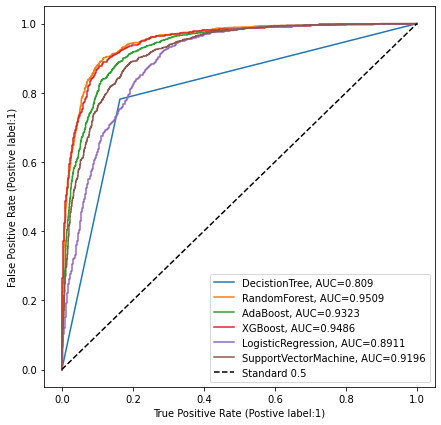

In [260]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(7,7)) 
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    model = models_1[i]
    model_name = model_names_1[i]
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",

]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    model = models_2[i]
    model_name = model_names_2[i]
    y_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = round(roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AUC="+str(auc))
plt.plot([0, 1], [0, 1], color="black", linestyle="--",label="Standard 0.5")
plt.xlabel('True Positive Rate (Postive label:1)')
plt.ylabel('False Positive Rate (Positive label:1)') 
#print legend
plt.legend()

In [261]:
table = ""
table = table + ("\tAlgoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\\\ \\hline \n")
print(table)
models = models_1 + models_2
for index in range(len(names)):
    name = names[index]
    clf = models[index]
    algoritm = name.split("_")[0] + "_" + "class5"
    TNLS = X_test_final['landslide'].value_counts()[1]
    try:
        NLS = X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1]['Very High']
    except:
        NLS = 0
    rel_error = (TNLS-NLS)/TNLS
    
    if(name in model_names_2):
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test_sc,y_test)
    else: 
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test,y_test)
    table = table + (f"{name} & {round(rel_error,3)} & {round(roc_auc_score_model,2) }& {round(accuracy,2) } & {round(recall[0],2) } & {round(recall[1],2) } & {round(f1score,2)}  \\\\ \\hline \n")
print(table)

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 
DecistionTree & 0.429 & 0.81& 0.81 & 0.84 & 0.78 & 0.78  \\ \hline 
RandomForest & 0.376 & 0.95& 0.89 & 0.91 & 0.87 & 0.87  \\ \hline 
AdaBoost & 1.0 & 0.93& 0.86 & 0.88 & 0.84 & 0.84  \\ \hline 
XGBoost & 0.269 & 0.95& 0.89 & 0.9 & 0.86 & 0.86  \\ \hline 
LogisticRegression & 0.645 & 0.89& 0.8 & 0.85 & 0.73 & 0.75  \\ \hline 
SupportVectorMachine & 0.474 & 0.92& 0.84 & 0.87 & 0.81 & 0.81  \\ \hline 



<Figure size 432x288 with 0 Axes>

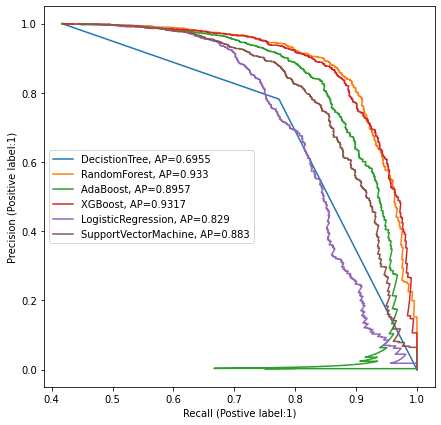

In [258]:
from sklearn.metrics import average_precision_score ,precision_recall_curve
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(7,7)) 
#fit for each
model_names_1 = [
    "DecistionTree", 
    "RandomForest",
    "AdaBoost",
    "XGBoost",
]
models_1 = [clf_dt,clf_rf,clf_adaboost,clf_xgboost,]
for i in range(4):
    model = models_1[i]
    model_name = model_names_1[i]
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = precision_recall_curve(y_test, y_pred)
    auc = round(average_precision_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AP="+str(auc))

#Fit with scaling needed
model_names_2 = [
    "LogisticRegression", 
    "SupportVectorMachine",

]
models_2 = [clf_logistic_regression,clf_svc]
for i in range(2):
    model = models_2[i]
    model_name = model_names_2[i]
    y_pred = model.predict_proba(X_test_sc)[:, 1]
    fpr, tpr, _ = precision_recall_curve(y_test, y_pred)
    auc = round(average_precision_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=str(model_name)+", AP="+str(auc))

plt.xlabel('Recall (Postive label:1)')
plt.ylabel('Precision (Positive label:1)') 
#print legend
plt.legend()

In [ ]:
def get_table_density_index(name,classes=['Very Low','Low','Medium','High','Very High']):
    print(name)
    table = ""
    table = table + ("\tClase & \t \\% Pixeles & \\% Landslides Train & \\% Landslides Test & LD Train & LD Test\\\\ \\hline \n")
    number_of_classes=len(classes)
    for class_pred in classes:
        algoritm = name.split("_")[0] + "_" + "class" + str(number_of_classes)

        try:
            pixels = 100*guatemala_points[algoritm].value_counts()[class_pred]/len(guatemala_points) 
        except:
            pixels = 0
            ld_train = 0
            ld_test =0
        try:
            train = 100*X_val.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred] /X_val['landslide'].value_counts()[1]
        except:
            train = 0
        try:
            test = 100*X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]/X_test_final['landslide'].value_counts()[1]
        except:
            test = 0
        if(pixels!=0):
            ld_train = train/pixels
            ld_test = test/pixels
        table = table +  ("\t{} & \t {} & {} & {}  & {} & {} \\\\ \\hline \n").format(class_pred,round(pixels,2),round(train,2),round(test,2),round(ld_train,2),round(ld_test,2))
    print(table)

In [ ]:
get_table_density_index(names[5])

SupportVectorMachine
	Clase & 	 \% Pixeles & \% Landslides Train & \% Landslides Test & LD Train & LD Test\\ \hline 
	Very Low & 	 55.04 & 7.26 & 6.9  & 0.13 & 0.13 \\ \hline 
	Low & 	 15.09 & 9.05 & 8.87  & 0.6 & 0.59 \\ \hline 
	Medium & 	 10.2 & 10.43 & 10.1  & 1.02 & 0.99 \\ \hline 
	High & 	 10.07 & 19.71 & 21.51  & 1.96 & 2.14 \\ \hline 
	Very High & 	 9.59 & 53.54 & 52.63  & 5.58 & 5.48 \\ \hline 



In [ ]:
def get_table_r_index(name,classes=['Very Low','Low','Medium','High','Very High']):
    print(name)
    table = ""
    table = table + ("\tClase & \t ni & Ni & ni/NI & LD R-index\\\\ \\hline \n")
    number_of_classes=len(classes) 
    for class_pred in classes:
        algoritm = name.split("_")[0] + "_" + "class" + str(number_of_classes)

        try:
            ni = X_val.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]
        except:
            ni = 0 
        try:
            NI = guatemala_points[algoritm].value_counts()[class_pred]
        except:
            NI =0
        try:
            numerator_train =  ni/NI
        except:
            numerator_train = 0
        # try:
        #     numerator_test = X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][class_pred]/guatemala_points[algoritm].value_counts()[class_pred]
        # except:
        #     numerator_test = 0
        sum_train = 0
        # sum_test = 0
        for x in classes:
            try:
                numerator_train_x = X_val.groupby(['landslide',algoritm])['landslide'].size()[1][x] /guatemala_points[algoritm].value_counts()[x]
                sum_train = sum_train + numerator_train_x  
            except:
                sum_train = sum_train + 0
                pass
        try:
            
            rindextrain = numerator_train/(sum_train*100)
        except:
            rindextrain =0

        # for x in classes:
        #     try:
        #         numerator_test_x = 100*X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1][x]/guatemala_points[algoritm].value_counts()[x]
        #         sum_test = sum_test + numerator_test_x  
        #     except:
        #         sum_test = sum_test + 0
        #         pass
        # try:
        #     rindextest = numerator_test/(sum_test*100)
        # except:
        #     rindextest =0
        table = table +  ("\t{} & \t {} & {} & {} & {}   \\\\ \\hline \n").format(class_pred,round(ni,0), round(NI,0), round(numerator_train,6), round(rindextrain,8))
    print(table)

In [ ]:
get_table_r_index(names[5])

SupportVectorMachine
	Clase & 	 ni & Ni & ni/NI & LD R-index\\ \hline 
	Very Low & 	 289 & 53382 & 0.005414 & 0.00014205   \\ \hline 
	Low & 	 360 & 14630 & 0.024607 & 0.00064563   \\ \hline 
	Medium & 	 415 & 9892 & 0.041953 & 0.00110076   \\ \hline 
	High & 	 784 & 9770 & 0.080246 & 0.00210547   \\ \hline 
	Very High & 	 2130 & 9305 & 0.228909 & 0.00600609   \\ \hline 



In [ ]:
def train_with_model_train_test_method_no_print_train_test(clf, X_test,y_test, X_train, y_train):
    prediction = clf.predict(X_test)
    prediction_prob = clf.predict_proba(X_test)
    prediction_train = clf.predict(X_train)
    prediction_prob_train = clf.predict_proba(X_train)
    accuracy = accuracy_score(y_test, prediction)
    roc_auc_score_model = roc_auc_score(y_test,prediction_prob[:,1], labels=[1,0])
    accuracy_train = accuracy_score(y_train, prediction_train)
    roc_auc_score_model_train = roc_auc_score(y_train,prediction_prob_train[:,1], labels=[1,0])
    return accuracy,roc_auc_score_model, accuracy_train,roc_auc_score_model_train

In [ ]:
table = ""
table = table + ("\tAlgoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\\\ \\hline \n")
print(table)
models = models_1 + models_2
for index in range(len(names)):
    name = names[index]
    clf = models[index]
    algoritm = name.split("_")[0] + "_" + "class5"
    TNLS = X_test_final['landslide'].value_counts()[1]
    try:
        NLS = X_test_final.groupby(['landslide',algoritm])['landslide'].size()[1]['Very High']
    except:
        NLS = 0
    rel_error = (TNLS-NLS)/TNLS
    
    if(name in model_names_2):
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test_sc,y_test)
    else: 
        accuracy,roc_auc_score_model, precision, recall,f1score = train_with_model_train_test_method_no_print(clf, X_test,y_test)
    table = table + (f"{name} & {round(rel_error,3)} & {round(roc_auc_score_model,2) }& {round(accuracy,2) } & {round(recall[0],2) } & {round(recall[1],2) } & {round(f1score,2)}  \\\\ \\hline \n")
print(table)
   

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 

	Algoritmo & Relative Error & ROC & Accuracy & Sensitivy & Specifity & F1Score \\ \hline 
DecistionTree & 0.429 & 0.81& 0.81 & 0.84 & 0.78 & 0.78  \\ \hline 
RandomForest & 0.376 & 0.95& 0.89 & 0.91 & 0.87 & 0.87  \\ \hline 
AdaBoost & 1.0 & 0.93& 0.86 & 0.88 & 0.84 & 0.84  \\ \hline 
XGBoost & 0.269 & 0.95& 0.89 & 0.9 & 0.86 & 0.86  \\ \hline 
LogisticRegression & 0.645 & 0.89& 0.8 & 0.85 & 0.73 & 0.75  \\ \hline 
SupportVectorMachine & 0.474 & 0.92& 0.84 & 0.87 & 0.81 & 0.81  \\ \hline 



In [ ]:
table = ""
table = table + ("\tAlgoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\\\ \\hline \n")
print(table)
models = models_1 + models_2
for index in range(len(names)):
    name = names[index]
    clf = models[index]
    
    if(name in model_names_2):
        accuracy,roc_auc_score_model, accuracy_train, roc_auc_score_model_train = train_with_model_train_test_method_no_print_train_test(clf, X_test_sc,y_test,X_train_sc,y_train)
    else: 
        accuracy,roc_auc_score_model, accuracy_train, roc_auc_score_model_train = train_with_model_train_test_method_no_print_train_test(clf, X_test,y_test,X_train,y_train)
    table = table + (f"{name} &  {round(roc_auc_score_model,2) }& {round(accuracy,2) } &  {round(roc_auc_score_model_train,2) }& {round(accuracy_train,2) }   \\\\ \\hline \n")
print(table)

	Algoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\ \hline 

	Algoritmo & ROC Train & ROC Test & ACC Train & ACC Test\\ \hline 
DecistionTree &  0.81& 0.81 &  1.0& 1.0   \\ \hline 
RandomForest &  0.95& 0.89 &  1.0& 1.0   \\ \hline 
AdaBoost &  0.93& 0.86 &  0.94& 0.87   \\ \hline 
XGBoost &  0.95& 0.89 &  1.0& 1.0   \\ \hline 
LogisticRegression &  0.89& 0.8 &  0.88& 0.8   \\ \hline 
SupportVectorMachine &  0.92& 0.84 &  0.92& 0.84   \\ \hline 

